In [1]:
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(4873)

In [2]:
data = pd.read_csv('simple_example.csv')
Y = data[['y']]
X = data[['x']]
# Add a new random variable, the coefficient of this variable should be 0
X['z'] = np.random.randint(2, size=20)
X = sm.add_constant(X)

In [4]:
ln_alphas = np.linspace(-6, -1, 100)
coefs = []
for ln_alpha in ln_alphas:
  # The penalty term of the lasso model does not include the intercept term,
  # We need to manually add the intercept term variable const to the data
  model = linear_model.Lasso(alpha=np.exp(ln_alpha), fit_intercept=False)
  model.fit(X[['x', 'z', 'const']], Y)
  coefs.append(model.coef_.tolist())
coefs = np.array(coefs)

<function matplotlib.pyplot.show(close=None, block=None)>

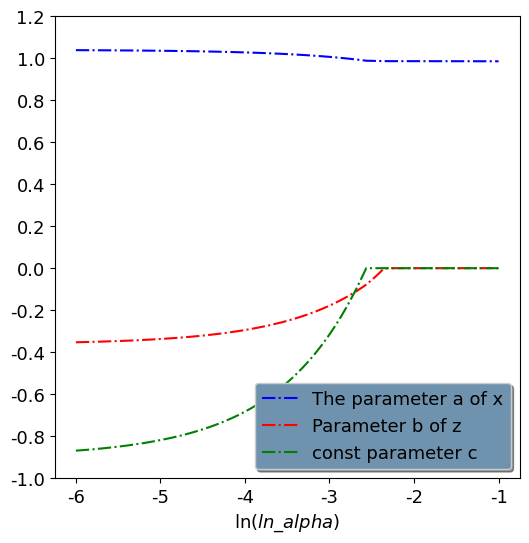

In [5]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size':13})
# Create a graphics frame
fig = plt.figure(figsize=(6, 6), dpi=100)
# Draw only one picture in the graphics box
ax = fig.add_subplot(111)
ax.plot(ln_alphas, coefs[:, 0], 'b-.', label='The parameter a of x')
ax.plot(ln_alphas, coefs[:, 1], 'r-.', label='Parameter b of z')
ax.plot(ln_alphas, coefs[:, 2], 'g-.', label='const parameter c')
# Set the legend style
legend = plt.legend(loc=4, shadow=True)
legend.get_frame().set_facecolor("#6F93AE")
ax.set_yticks(np.arange(-1.0, 1.3, 0.2))
ax.set_xlabel("$\ln(ln\_alpha)$")
plt.savefig('linear_ml_reg.png', dpi=200)
plt.show